## 라이브러리 불러오기

<Axes: >

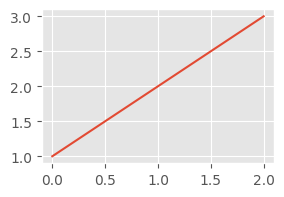

In [1]:
# 시각화 잘 되는지 확인하는 코드 # 라이브러리 잘 작동하는지
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')
pd.Series([1,2,3]).plot(figsize=(3,2))

## 데이터 불러오기

In [2]:
# df = pd.read_csv('https://raw.githubusercontent.com/JayoungKim-ai/ML_dataset/main/advertising.csv')
df = pd.read_csv('data/advertising.csv')

# 상위 5개 행 확인
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [3]:
# 데이터프레임 정보 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


->
- 200개의 데이터가 있다
- 200개의 행이 있는데 누락값은 없구나(non-null)
- 데이터 타입은 다 float형이구나
- 컬럼명은 TV, Radio, Newspaper, Sales구나

## 데이터 이해

### 매체별 광고비에 따른 판매량

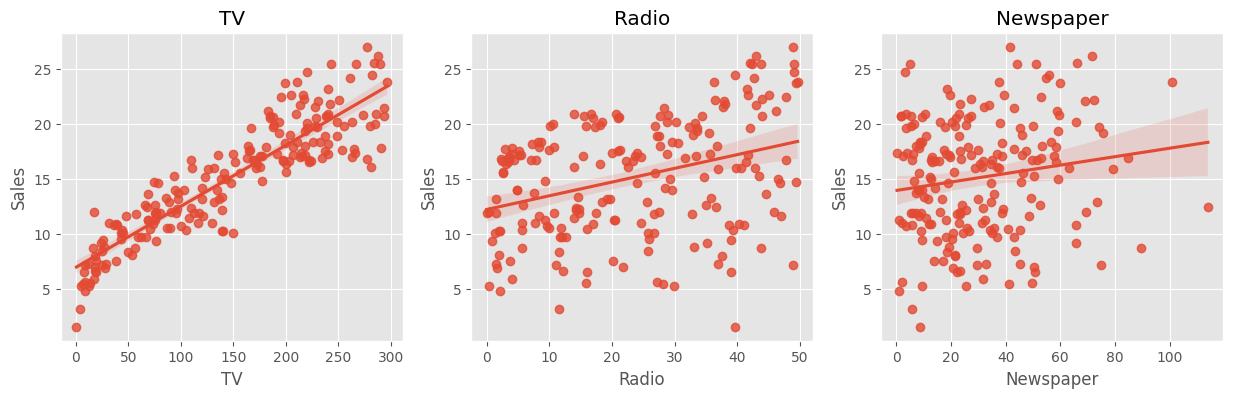

In [12]:
# 시각화

# TV 광고비에 따른 판매량
plt.figure(figsize=(15,4))

# TV 광고비에 따른 판매량
plt.subplot(1,3,1)
sns.regplot(data=df, x='TV', y='Sales')
plt.title('TV')

# Radio 광고비에 따른 판매량
plt.subplot(1,3,2)
sns.regplot(data=df, x='Radio', y='Sales')
plt.title('Radio')

# Newspaper 광고비에 따른 판매량
plt.subplot(1,3,3)
sns.regplot(data=df, x='Newspaper', y='Sales')
plt.title('Newspaper')

# for i, feature_name in enumerate(df.columns[:3]):
#     plt.subplot(1,3,i+1)
#     sns.regplot(data=df, x=feature_name, y='Sales')
#     plt.title(feature_name)

plt.show()

### 상관계수

In [13]:
# 상관계수 히트맵 시각화
df.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.901208
Radio,0.054809,1.000000,0.354104,0.349631
Newspaper,0.056648,0.354104,1.000000,0.157960
Sales,0.901208,0.349631,0.157960,1.000000


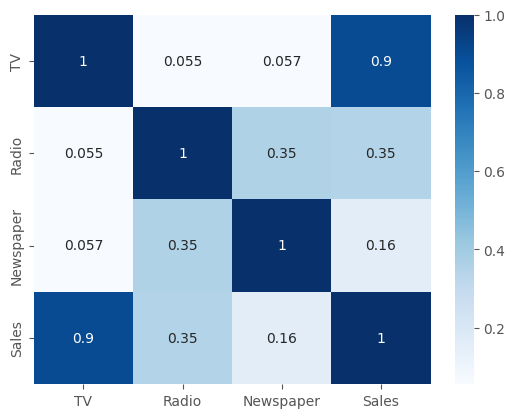

In [23]:
sns.heatmap(df.corr(), cmap='Blues', annot=True)
# sns.color_palette("coolwarm", as_cmap=True)
# sns.heatmap(df.corr(), cmap=sns.color_palette("spring", as_cmap=True))
# sns.heatmap(df.corr(), cmap='coolwarm')
plt.show()


##  단순선형회귀

- 상관계수가 가장 높았던 TV광고량에 따른 판매량 예측

### 독립변수, 종속변수 선택

In [24]:
X = df[['TV']] # 독립변수는 2차원이어야 함
y = df['Sales']

### 훈련세트, 테스트세트 분할 (train, test)

In [25]:
# 훈련세트, 테스트세트 분할
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42) # test_size=0.25 # 0.75:0.25 디폴트인듯

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape) # 맞게 입력했는지 확인하기 위해 shape 출력해보기

(150, 1) (50, 1) (150,) (50,)


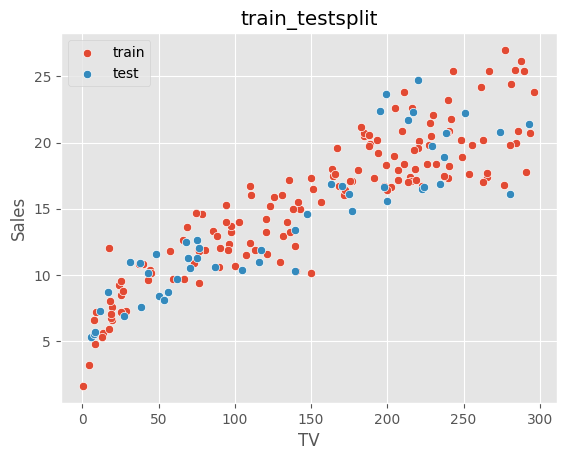

In [26]:
# 훈련세트, 테스트세트 분할 확인 (시각화)
sns.scatterplot(x=X_train['TV'], y=y_train, label="train")
sns.scatterplot(x=X_test['TV'], y=y_test, label="test")
plt.legend()
plt.title("train_testsplit")
plt.xlabel('TV')
plt.show()

In [ ]:
# cf)
# sklearn.model_selection : 데이터 분할 관련 함수들이 들어있음
# sklearn.metrics: 모델 평가와 관련된 함수들이 들어있음

## 모델 생성 및 훈련

In [27]:
# LinearRegression 클래스 import
from sklearn.linear_model import LinearRegression

# 모델 생성하기 (빈 모델)
model = LinearRegression()

# 훈련데이터로 모델 훈련하기
model.fit(X_train, y_train)

LinearRegression()

In [29]:
# +++ ipynb 파일에서 어떤 변수의 뒤에 ? 를 붙이고 실행하면 그 변수의 정보를 표시해줍니다
model?
model.fit?

Signature: model.fit(X, y, sample_weight=None)
Docstring:
Fit linear model.

Parameters
----------
X : {array-like, sparse matrix} of shape (n_samples, n_features)
    Training data.

y : array-like of shape (n_samples,) or (n_samples, n_targets)
    Target values. Will be cast to X's dtype if necessary.

sample_weight : array-like of shape (n_samples,), default=None
    Individual weights for each sample.

    .. versionadded:: 0.17
       parameter *sample_weight* support to LinearRegression.

Returns
-------
self : object
    Fitted Estimator.
File:      c:\users\user\appdata\local\programs\python\python313\lib\site-packages\sklearn\linear_model\_base.py
Type:      method

## 모델 성능 평가 (테스트세트로 평가)

In [ ]:
# 평가를 위한 함수들
# mean_squared_error : 평균제곱오차
# root_mean_squared_error : 평균제곱근오차
# mean_absolute_error : 평균절대오차
# r2_score : 결정계수

In [35]:
# 모델 평가를 위한 함수 import
from sklearn.metrics import mean_squared_error, root_mean_squared_error, mean_absolute_error, r2_score

# 테스트 데이터의 예측값
pred = model.predict(X_test)

# 예측값과 실제값의 차이(Loss/Error) 이용한 모델 평가
mse = mean_squared_error(y_test, pred)
rmse = root_mean_squared_error(y_test, pred)
mae = mean_absolute_error(y_test, pred)
r2 = r2_score(y_test, pred)

print(f'''
MSE\t: {mse:.2f}
RMSE\t: {rmse:.2f}
MAE\t: {mae:.2f}
R2\t: {r2:.2f}\t# 1에 가까울수록 높은 성능의 모델
        ''')


MSE	: 5.51
RMSE	: 2.35
MAE	: 1.87
R2	: 0.80	# 1에 가까울수록 높은 성능의 모델
        


- 평균제곱오차 (MSE: Mean Squared Error): 5.51 <br>
낮을수록 좋은 지표입니다. 예측값과 실제값의 차이를 제곱하여 평균낸 값으로, 예측 오차의 크기를 나타냅니다. MSE 값이 5.51로, 오차가 꽤 있는 편으로 볼 수 있습니다.<br><br>
- 평균제곱근오차 (RMSE: Root Mean Squared Error): 2.35 <br>
MSE의 제곱근 값으로, 실제 오차의 크기를 더 직관적으로 나타냅니다. RMSE가 2.35로, MSE와 마찬가지로 모델의 예측 오차가 어느 정도 있음을 보여줍니다.<br><br>
- 평균절대오차 (MAE: Mean Absolute Error): 1.87 <br>
예측값과 실제값의 차이의 절대값을 평균낸 값입니다. MAE가 1.87로, 예측값과 실제값의 평균적인 차이가 약 1.87임을 나타냅니다.<br><br>
- 결정계수 (R²: Coefficient of Determination): 0.80 <br>
1에 가까울수록 좋은 지표입니다. 모델이 실제 데이터를 얼마나 잘 설명하는지를 나타내며, 0.80은 모델이 전체 변동성의 80%를 설명하고 있음을 의미합니다. 꽤 괜찮은 성능을 보여주고 있네요.<br><br>

In [ ]:
'''
비교대상이 없다. 애초에 데이터 값 $1000단위, $1단위, 다를 수 있다.
데이터 크기에 따라 다르다 -> 오차가 있어도 데이터에 따라 얼마나 오차인지 달라진다
-> 정규화나 표준화를 하고서 비교하면 평가가 가능하다
'''

In [36]:
# 실제값과 모델의 에측값 비교
df_pred = pd.DataFrame({'X_test':X_test['TV'],
    'y_test':y_test,
    'y_pred':pred})
df_pred['error'] = df_pred['y_test']-df_pred['y_pred']
df_pred.head(10)

,X_test,y_test,y_pred,error
95,163.3,16.9,16.143474,0.756526
15,195.4,22.4,17.921382,4.478618
30,292.9,21.4,23.321569,-1.921569
158,11.7,7.3,7.746876,-0.446876
128,220.3,24.7,19.300506,5.399494
115,75.1,12.6,11.258382,1.341618
69,216.8,22.3,19.106654,3.193346
170,50.0,8.4,9.868180,-1.468180
174,222.4,16.5,19.416818,-2.916818
45,175.1,16.1,16.797035,-0.697035


In [ ]:
'''
163.3일 때 16.9개 팔렸고... 16.14로 예측했고 오차는 0.75이다~~

저 error를 절대값 취한 다음에 평균을 구하면 MAE
'''

In [41]:
# 회귀모델의 평가점수 수동 계산
mae = abs(df_pred['error']).mean()
mse = np.square(df_pred['error']).mean()
rmse = np.sqrt(mse)

# r2_score
rss = np.square(df_pred['y_test'] - df_pred['y_pred']).sum() # (타깃-예측)**2의 합
tss = np.square(df_pred['y_test'] - df_pred['y_test'].mean()).sum() # (타깃-평균)**2의 합
r2 = 1 - (rss/tss) 

print(f"MAE\t: {mae:.2f}")
print(f"MSE\t: {mse:.2f}")
print(f"RMSE\t: {rmse:.2f}")
print(f"R2\t: {r2:.2f}")

MAE	: 1.87
MSE	: 5.51
RMSE	: 2.35
R2	: 0.80


## 모델의 학습 결과

In [ ]:
# 회귀계수(w)
print('회귀계수\t:', model.coef_) # _ -> 모델이 학습한 결과 # 여러 개가 있을 수 있어서 []로 나온다
w = model.coef_
# 절편(b)
print('절편\t:', model.intercept_)
b = model.intercept_
# 회귀식
print(f'회귀식\t: y = w({w[0]:.2f}) * TV + b({b:.2f})')

회귀계수	: [0.05538653]
절편	: 7.098853680118275
회귀식	: y = w(0.06) * TV + b(7.10)


<Axes: xlabel='TV', ylabel='Sales'>

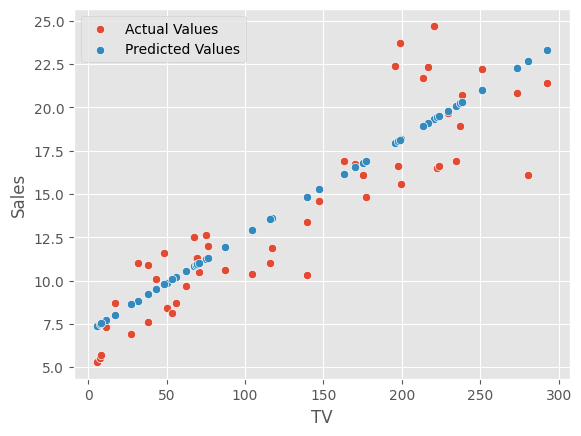

In [48]:
# 테스트데이터 실제값과 예측값 확인(독립변수-종속변수 관계 시각화)
sns.scatterplot(x=X_test['TV'], y=y_test, label='Actual Values')
sns.scatterplot(x=X_test['TV'], y=pred, label='Predicted Values')

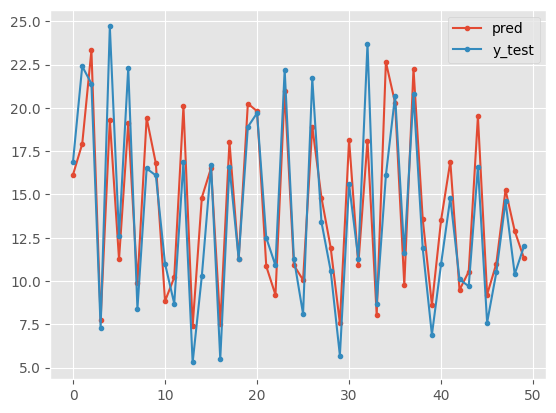

In [53]:
plt.plot(pred, marker='.', label='pred')
plt.plot(np.array(y_test), marker='.', label='y_test') # y_test.values
plt.legend()

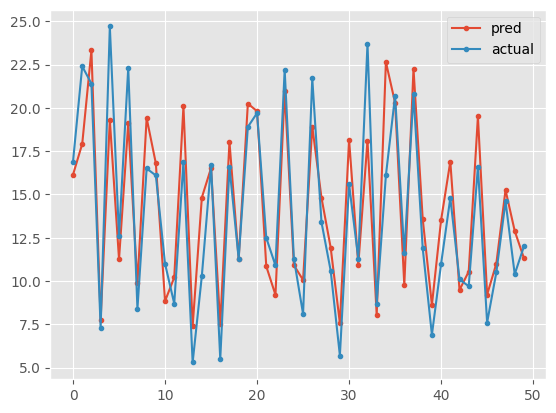

In [54]:
plt.plot(pred, marker='.', label='pred')
plt.plot(np.array(y_test), marker='.', label='actual')
plt.legend();

## 새로운 값 예측하기

In [55]:
# TV 광고비 입력받기
tv =100
print(f'TV광고비 : {tv}')

# 예측 함수 사용
print(model.predict([[tv]]))

# 모델이 학습한 공식에 대입(wx+b)
print(model.coef_ *tv +model.intercept_)

TV광고비 : 100
[12.63750677]
[12.63750677]


c:\Users\USER\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


# 다중회귀

## 변수 선택

In [56]:
# 독립변수, 종속변수 선택
X2 = df[['TV', 'Radio', 'Newspaper']] # 2차원이라서 [[]]
y = df['Sales']

<Axes: >

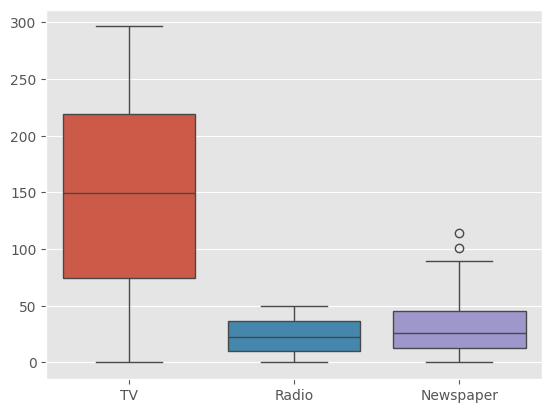

In [57]:
# 독립변수의 데이터 분포 파악
sns.boxplot(X2)

## 독립변수 스케일링

In [ ]:
# TV, Radio, Newspaper 각각 광고비 단가가 달라서 이를 표준화 시켜서 정규분포로 만들어주기

In [59]:
# 데이터 스케일링
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() # 스케일링 객체를 만듦. 스케일러로 스케일링 진행 (정규분포로...)
# scaler.fit(X2)
# X2_scaled = scaler.transform(X2)
X2_scaled = scaler.fit_transform(X2) # 스케일러가 데이터를 학습한 다음에 변환하게 하는 과정

scaled_TV = X2_scaled[:,0]
scaled_Radio = X2_scaled[:,1]
scaled_Newspaper = X2_scaled[:,2]

print(f'스케일링 된 각 변수의 평균 : {X2_scaled[:,0].mean()}, {X2_scaled[:,1].mean()}, {X2_scaled[:,2].mean()}')
print(f'스케일링 된 각 변수의 표준편차 :{X2_scaled[:,0].std()}, {X2_scaled[:,1].std()}, {X2_scaled[:,2].std()}')

스케일링 된 각 변수의 평균 : 1.2212453270876723e-16, -4.529709940470639e-16, 2.220446049250313e-16
스케일링 된 각 변수의 표준편차 :1.0, 1.0, 0.9999999999999999


## 훈련 및 평가

In [60]:
# 훈련세트, 테스트세트 분할
X_train, X_test, y_train, y_test = train_test_split(X2_scaled, y, random_state=42) # 스케일링 한 데이터 넣기
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(150, 3) (50, 3) (150,) (50,)


In [61]:
# 빈 모델 객체 생성
from sklearn.linear_model import LinearRegression
model2 = LinearRegression()

# 모델 학습
model2.fit(X_train, y_train)

LinearRegression()

## 모델 성능 평가

In [62]:
# 테스트데이터로 예측
pred = model2.predict(X_test)

# 모델 평가
mse = mean_squared_error(y_test, pred)
rmse = root_mean_squared_error(y_test, pred)
mae = mean_absolute_error(y_test, pred)
r2 = r2_score(y_test, pred)

print('===다중회귀 모델의 평가결과===')
print(f'MSE\t: {mse:.2f}')
print(f'RMSE\t: {rmse:.2f}')
print(f'MAE\t: {mae:.2f}')
print(f'R2\t: {r2:.2f}')

===다중회귀 모델의 평가결과===
MSE	: 2.40
RMSE	: 1.55
MAE	: 1.12
R2	: 0.91


In [64]:
# 모델의 학습 결과
# 회귀계수
print(f'회귀계수:{model2.coef_}')

# 절편
print(f'절편:{model2.intercept_}')

# 회귀식
w1 = model2.coef_[0]
w2 = model2.coef_[1]
w3 = model2.coef_[2]
b = model2.intercept_
print(f'회귀식: y = w1({w1:.2f}) * tv + w2({w2:.2f}) * radio + w3({w3:.2f}) * newspaper + b({b:.2f})')

회귀계수:[4.67709227 1.4774023  0.09352121]
절편:15.22473459736965
회귀식: y = w1(4.68) * tv + w2(1.48) * radio + w3(0.09) * newspaper + b(15.22)


## 새로운 값 예측하기

In [68]:
# 예측할 값
new_data = [[175, 15, 2]]

# 예측 함수를 이용한 예측
new_data_scaled = scaler.transform(new_data)

model2.predict(new_data_scaled)
print(model2.predict(new_data_scaled))

# 회귀식에 값을 대입하여 예측
print(f'{model2.coef_[0] * new_data_scaled[0,0] + model2.coef_[1] * new_data_scaled[0,1] +  model2.coef_[2] * new_data_scaled[0,2] + model2.intercept_}')

[15.80426509]
15.804265090536152


c:\Users\USER\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [ ]:
# fit은 재료(학습 데이터) 모양에 맞는 붕어빵 틀을 만드는 것이고, transform은  재료에 틀을 찍어눌러서 모양을 바꿔주는 것
# 현재 이 데이터에서는 minmaxscaler는 별로 좋지 않은 이유는, radio,newspaper에 비해 tv는 최대최소값의 차이가 많이 나기 때문에 데이터가 왜곡될 수 있다고 생각하면 된다
# 독립회귀랑 다중회귀 때 각각 scaler = StandardScaler()으로 scaler 객체를 생성하는데 위 아래 다른 객체이다.

# 공식
new_data2 = np.array(X2)
# 1. 평균(mu) 계산 (각 열에 대해 계산)
mu = np.mean(new_data2, axis=0)

# 2. 표준편차(sigma) 계산 (각 열에 대해 계산)
sigma = np.std(new_data2, axis=0)

# 3. 표준화 공식 적용
new_data2_scaled = (new_data2 - mu) / sigma

# scaler 객체는 fit을 내부적으로 저장하고, 이를 나중에 transform을 사용할 때 활용
# -> 따라서 fit_transform을 하게 되면 새로운 fit이 적용되기 때문에 transform을 사용해야 해당 핏이 적용됨

# 원래는 정규화 시키는 식이 있지만 이를 우리가 직접 식을 쓰지 않고 불러와서 쓰고 이를 적용시키는 것이 fit_transform

# fit은 매개변수를 계산하고 저장.
# transform은 저장된 매개변수를 사용하여 데이터를 변환.
# fit_transform은 새로운 매개변수를 계산하고 데이터를 변환

# 다항회귀

* 특성공학: 기존의 특성을 사용하여 새로운 특성을 뽑아내는 작업
- 특성이 많을수록 디테일하게 학습하여 성능을 높이는 효과를 줄 수 있다.
- 단, 특성이 많은 경우 과적합의 위험이 있을 수 있다.
- 다항식 특성은 원본 특성의 거듭제곱을 포함하므로, 특성 스케일링이 중요할 수 있다

In [69]:
# 다항식 조합 생성
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X2)
print(f'특성의 크기 : {X_poly.shape}')

# 스케일링
scaler = StandardScaler()
X_poly_scaled = scaler.fit_transform(X_poly)

# 훈련세트, 테스트세트 분할
X_train, X_test, y_train, y_test = train_test_split(X_poly_scaled, y, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

# 모델 생성 및 학습
model_poly = LinearRegression()
model_poly.fit(X_train, y_train)

# 평가
print(f'train score : {model_poly.score(X_train, y_train)}')
print(f'test score : {model_poly.score(X_test, y_test)}')

특성의 크기 : (200, 10)
(150, 10) (50, 10) (150,) (50,)
train score : 0.9276607239475623
test score : 0.9485618659991301


In [72]:
# 다항식 조합 생성 # degree 바꿔보기
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=3)
X_poly = poly.fit_transform(X2)
print(f'특성의 크기 : {X_poly.shape}')

# 스케일링
scaler = StandardScaler()
X_poly_scaled = scaler.fit_transform(X_poly)

# 훈련세트, 테스트세트 분할
X_train, X_test, y_train, y_test = train_test_split(X_poly_scaled, y, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

# 모델 생성 및 학습
model_poly = LinearRegression()
model_poly.fit(X_train, y_train)

# 평가
print(f'train score : {model_poly.score(X_train, y_train)}')
print(f'test score : {model_poly.score(X_test, y_test)}')

특성의 크기 : (200, 20)
(150, 20) (50, 20) (150,) (50,)
train score : 0.9363844104766007
test score : 0.9362258487284236


In [ ]:
'''
특성의 크기 10개: 1, a, b, c, ab, bc, ac, a2, b2, c2

degree 9로 하니 슈퍼과적합. train_score도 1.0으로 만점임(아마?)
'''

# 규제

## Ridge

In [73]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=9)
X_ploy = poly.fit_transform(X2)
print(X_ploy.shape)

# 스케일링
scaler = StandardScaler()
X_poly_scaled = scaler.fit_transform(X_ploy)

# 훈련련세트, 테스트세트 분할
X_train, X_test, y_train, y_test = train_test_split(X_poly_scaled, y, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

# 모델 생성 및 학습
from sklearn.linear_model import Ridge
model_ridge = Ridge(alpha = 10) # alpha : 규제강도
model_ridge.fit(X_train, y_train)

# 평가
print(f'train score : {model_ridge.score(X_train, y_train)}')
print(f'train score : {model_ridge.score(X_test, y_test)}')

(200, 220)
(150, 220) (50, 220) (150,) (50,)
train score : 0.9216197291137791
train score : 0.944473790302263


In [ ]:
'''
릿지 회귀는 계수를 0으로 만들지 않는 대신 모든 변수를 조금씩 활용하려는 목적이 있음.
'''

In [ ]:
# # [퀴즈...]
# # 모델 훈련
# from sklearn.model_selection import train_test_split
# # ~~
# model.fit()
# # 예측
# ??.predict()
# # ??
# from sklearn.metrics import mean_squared_error